<a href="https://colab.research.google.com/github/levynlee/ESAA/blob/main/OB_3%EC%A1%B0_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 로드 및 패키지 불러오기

https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download

### 변수 설명

- age: 나이 (연속형 변수)
- sex: 성별 (범주형 변수)
- bmi: (연속형 변수)
- children: 자녀의 수: (연속형 변수)
- smoker: 흡연 여부: (범주형 변수)
- region: 지역 (범주형 변수)
- charges: 개인별 보험료 (연속형 변수)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

file_path =  "/content/gdrive/My Drive/ESAAData/OB_PROJECT/"

Mounted at /content/gdrive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(file_path + "insurance.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. 데이터 살펴보기

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


-> 결측치 없음

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


- 범주형의 경우 null값이 "null"과 같이 있을 수 있기에 확인

In [ ]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


In [ ]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


-> 결측치 없음

# 3. 데이터 시각화

In [ ]:
columns = df.columns
columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
con_list = ['age', 'bmi', 'children', 'charges']
cat_list = ['sex', 'smoker', 'region']

- 연속형 변수 분포 확인

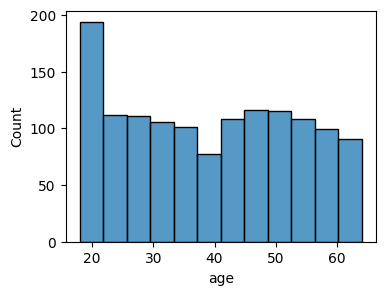

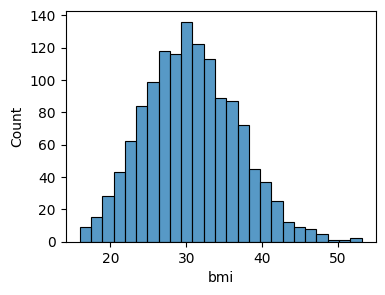

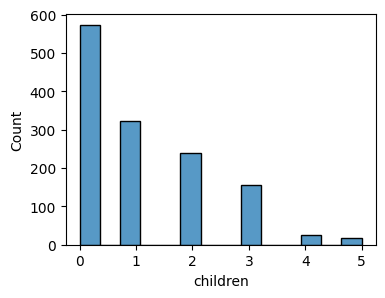

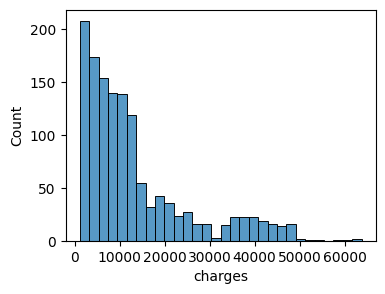

In [ ]:
for i in con_list:
  ax = plt.subplots(figsize=(4, 3))
  ax = sns.histplot(df[i])

-> 종속변수가 꽤나 skew되어 보임

- 범주형 변수 분포 확인

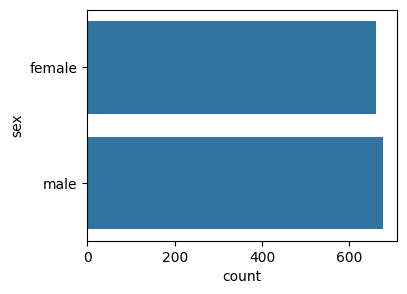

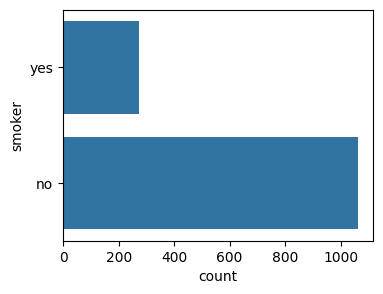

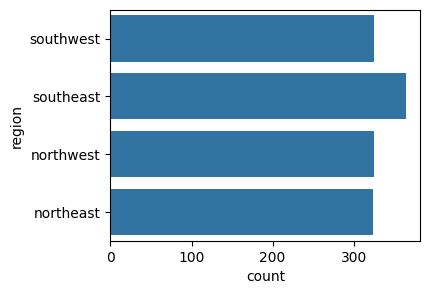

In [ ]:
for i in cat_list:
  ax = plt.subplots(figsize=(4, 3))
  ax = sns.countplot(df[i])

- 연속형 변수 간의 상관관계 확인

In [ ]:
con_list[:-1]

['age', 'bmi', 'children']

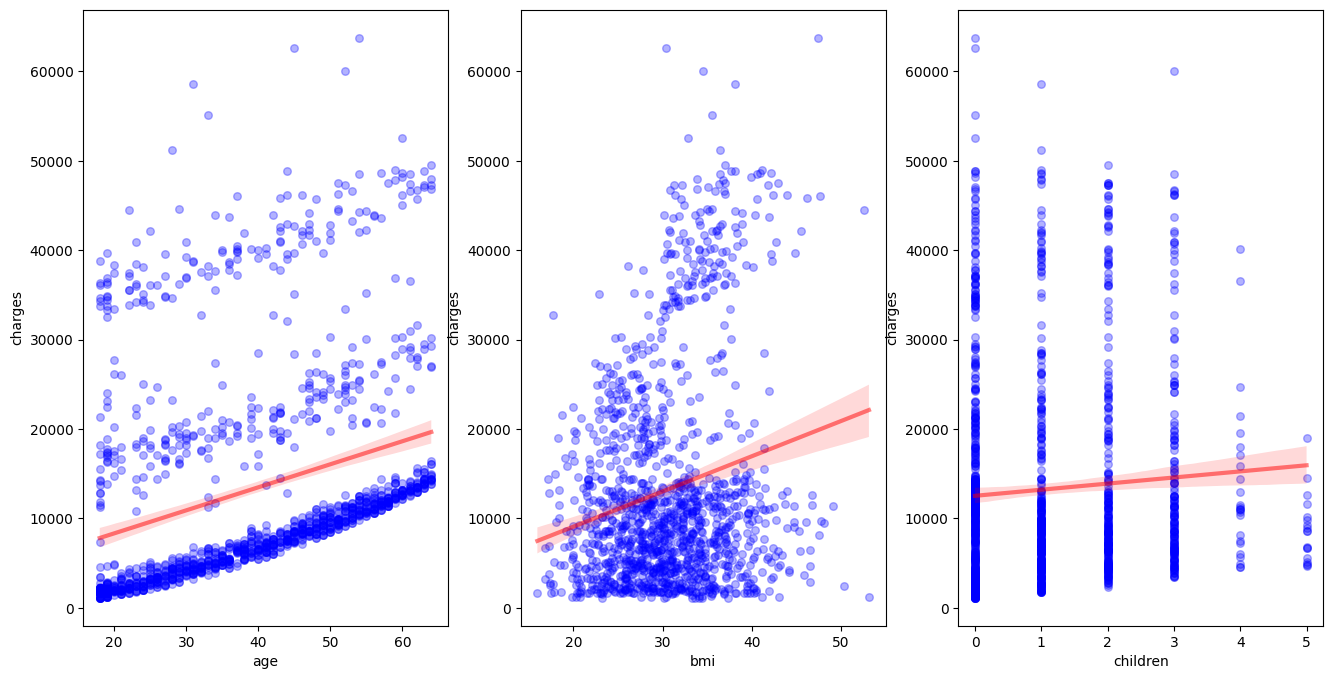

In [ ]:
fig, axs = plt.subplots(figsize=(16,8) , nrows=1, ncols=3)

for i , feature in enumerate(con_list[:-1]):
    row = 0
    col = i
    plt.xlabel(feature)
    sns.regplot(x=feature , y='charges',data=df ,
                ax=axs[col],
                scatter_kws={"fc":"b", "ec":"b", "s":30, "alpha":0.3}, color="r", line_kws={"lw":3,"alpha":0.5})

-> 나이에 따라서 charges가 많아짐, charges가 세 그룹으로 나뉘어 보임

-> bmi 정상 범위인 18.5 ~ 22.9 사이에 위치한 사람들은 크게 상관관계가 없어 보이나 그 이상의 경우 bmi가 크면 charge가 크다고 볼 수도 있음

-> children과는 상관관계 없어보임

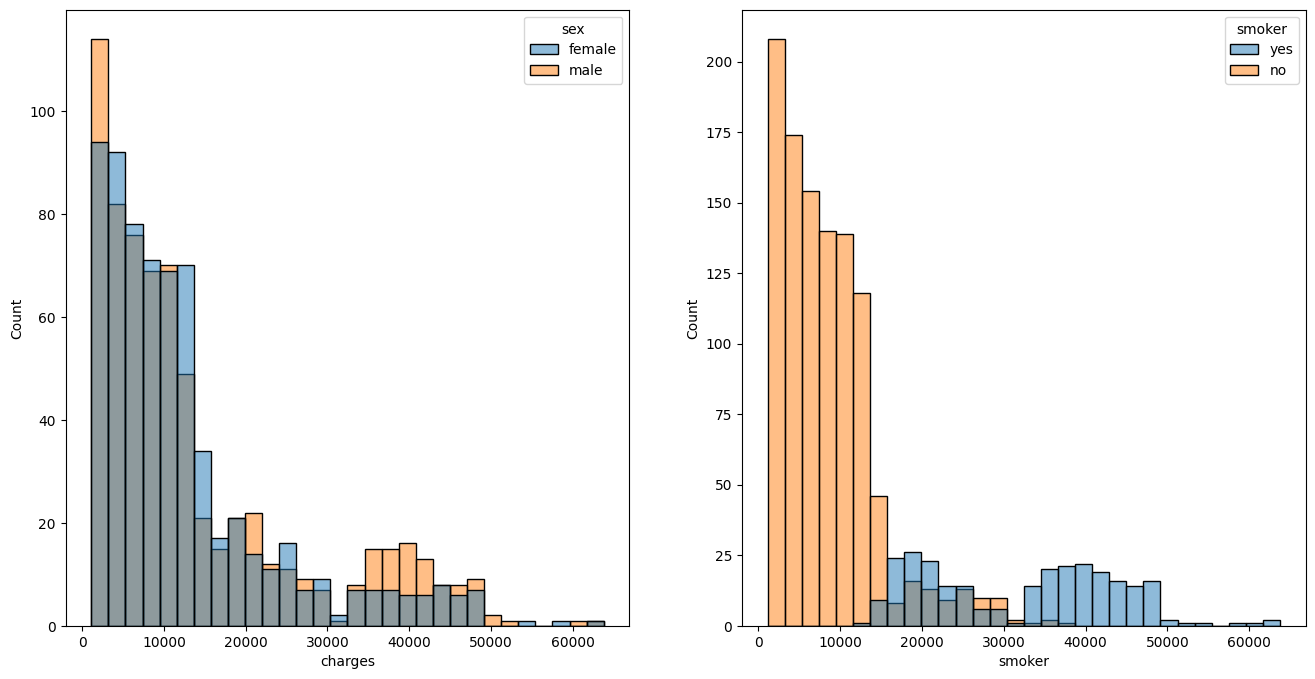

In [ ]:
fig, axs = plt.subplots(figsize=(16,8) , nrows=1, ncols=2)

for i , feature in enumerate(cat_list[:2]):
    row = 0
    col = i
    plt.xlabel(feature)
    sns.histplot(x='charges' , hue=feature, data=df, ax=axs[col])

-> 남성 집단과 흡연자 집단이 전반적으로 charge가 높아보임

In [ ]:
print(np.mean(df['charges'][df['sex']=='female']))
print(np.mean(df['charges'][df['sex']=='male']))
print(np.mean(df['charges'][df['smoker']=='no']))
print(np.mean(df['charges'][df['smoker']=='yes']))

12569.578843835347
13956.751177721893
8434.268297856204
32050.23183153284


-> 평균값으로 비교해봐도 확실히 남성집단이 여성 집단보다 charges가 큼

-> 흡연자와 비흡연자간의 약 4배정도로 큼

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

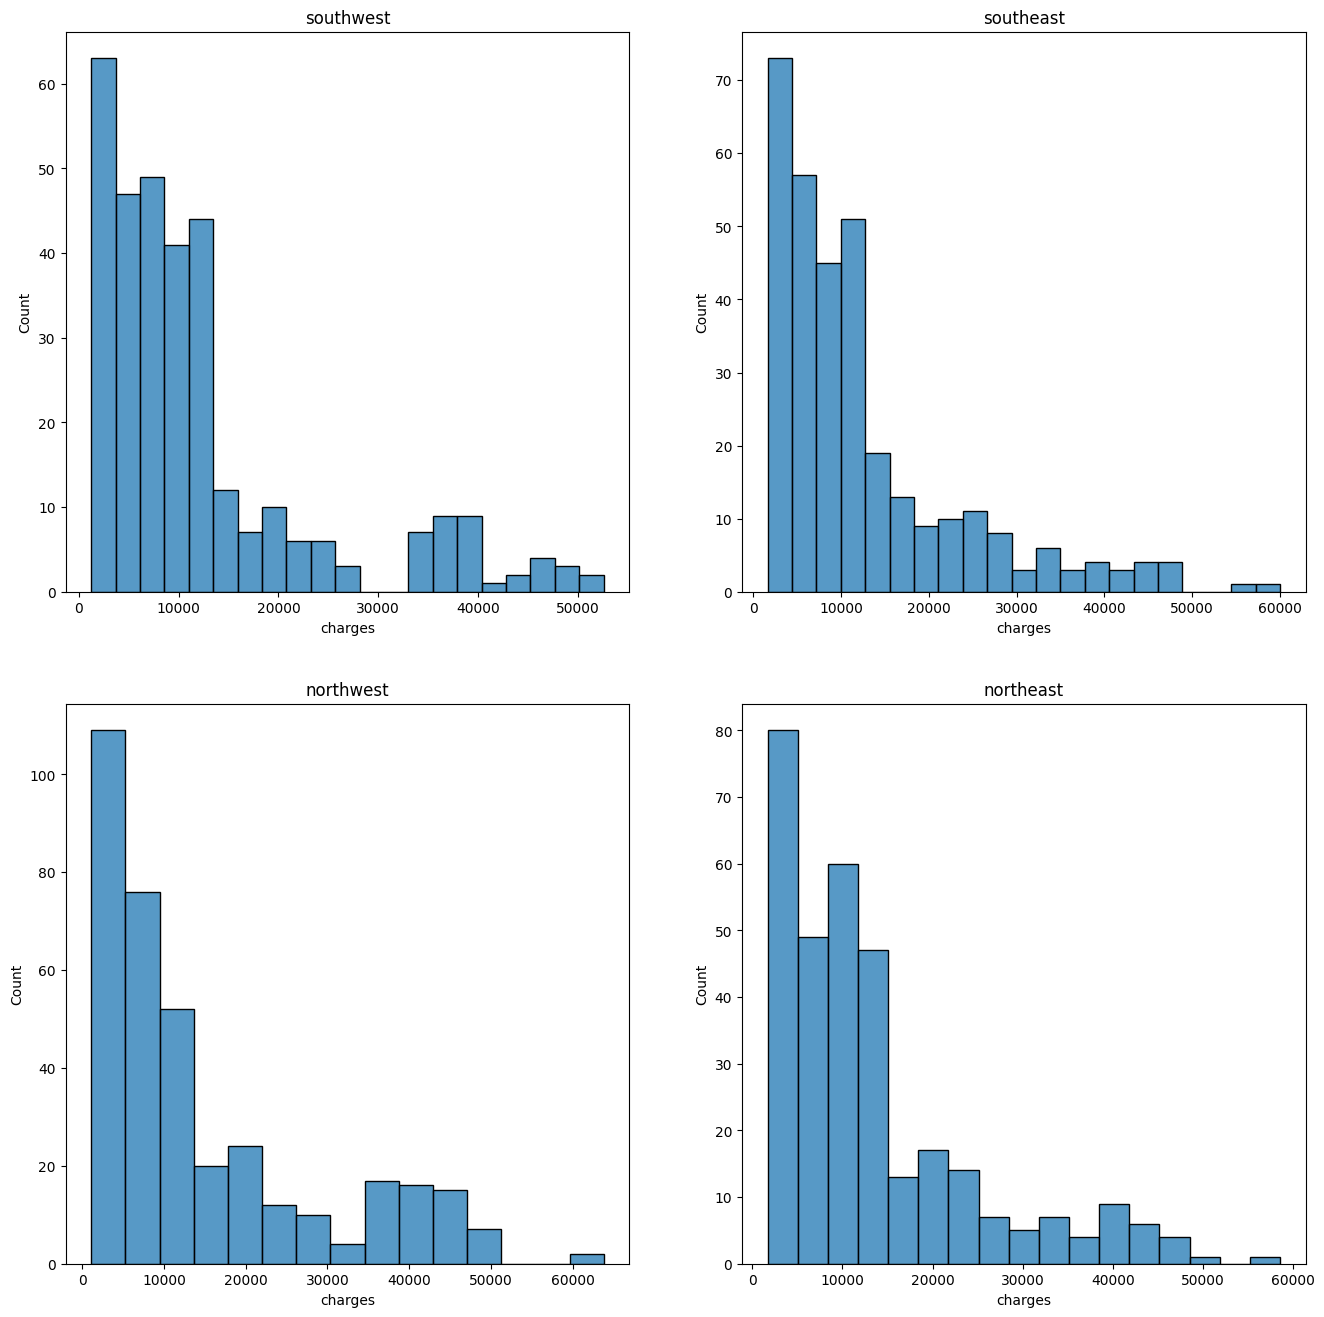

In [ ]:
fig, axs = plt.subplots(figsize=(16,16) , nrows=2, ncols=2)

for i , regions in enumerate(['southwest', 'southeast', 'northwest', 'northeast']):
    row = i%2
    col = i//2
    sns.histplot(x='charges' ,  data=df[df['region'] == regions], ax=axs[row][col])

axs[0, 0].title.set_text("southwest")
axs[0, 1].title.set_text("southeast")
axs[1, 0].title.set_text("northwest")
axs[1, 1].title.set_text("northeast")

In [ ]:
for regions in ['southwest', 'southeast', 'northwest', 'northeast']:
    print(np.mean(df['charges'][df['region']==regions]))

12346.937377292308
14735.411437609888
12417.57537396923
13406.384516385804


In [ ]:
df_encoded = pd.get_dummies(df, drop_first = True, dtype = int)
df_encoded.head(3)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,0,1,0,0,1
1,18,33.77,1,1725.5523,1,0,0,1,0
2,28,33.00,3,4449.4620,1,0,0,1,0


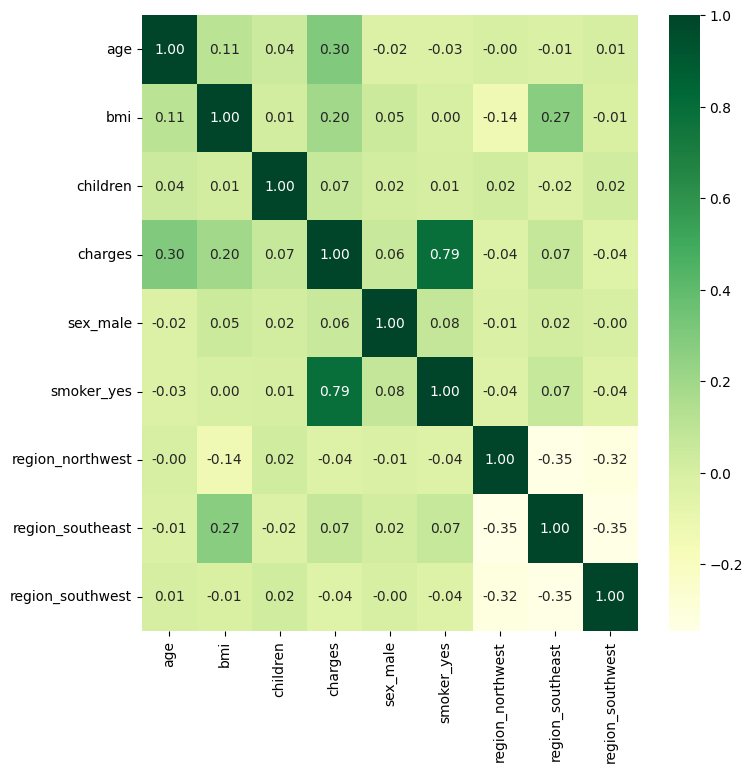

In [ ]:
corr_matrix = df_encoded.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGn', fmt='.2f')
plt.show()

-> 흡연자와의 상관관계가 가장 큼

# 4. 데이터 전처리

In [ ]:
# 자녀 유무로 child_group 생성 후 children column 삭제
child_group = []
for i in range(len(df)):
    if df['children'][i]==0:
        child_group.append(0)
    else:
        child_group.append(1)
df['child_group']=pd.DataFrame(child_group)
df.drop(columns=['children'], inplace=True)

In [ ]:
df.head()

,age,sex,bmi,smoker,region,charges,child_group
0,19,female,27.900,yes,southwest,16884.92400,0
1,18,male,33.770,no,southeast,1725.55230,1
2,28,male,33.000,no,southeast,4449.46200,1
3,33,male,22.705,no,northwest,21984.47061,0
4,32,male,28.880,no,northwest,3866.85520,0


In [ ]:
# categorical variables one-hot encoding
df = pd.get_dummies(df, columns=['region'], prefix=['region'])

In [ ]:
# categorical variables label encoding
from sklearn.preprocessing import LabelEncoder
x = df.drop(columns=["charges"], axis=1)
y = df["charges"]
le = LabelEncoder()
x['sex'] = le.fit_transform(x['sex'])
x['smoker'] = le.fit_transform(x['smoker'])

In [ ]:
# train, test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
con_list = ['age', 'bmi', 'charges']
cat_list = ['sex', 'smoker', 'region', 'child_group']

In [ ]:
# x variables scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

mm = MinMaxScaler()
X_train_mm = X_train.copy()
X_train_mm[con_list[:-1]] = mm.fit_transform(X_train_mm[con_list[:-1]])
X_test_mm = X_test.copy()
X_test_mm[con_list[:-1]] = mm.transform(X_test_mm[con_list[:-1]])

ss = StandardScaler()
X_train_ss = X_train.copy()
X_train_ss[con_list[:-1]] = ss.fit_transform(X_train_ss[con_list[:-1]])
X_test_ss = X_test.copy()
X_test_ss[con_list[:-1]] = ss.transform(X_test_ss[con_list[:-1]])

In [ ]:
X_test_mm.head()

,age,sex,bmi,smoker,child_group,region_northeast,region_northwest,region_southeast,region_southwest
107,0.173913,1,0.401264,0,1,False,True,False,False
761,0.108696,1,0.517622,0,1,False,False,False,True
1138,0.326087,1,0.384450,0,0,False,False,True,False
74,0.565217,1,0.307775,0,1,False,False,False,True
556,0.608696,1,0.470272,0,1,True,False,False,False


In [ ]:
X_test_ss.head()

,age,sex,bmi,smoker,child_group,region_northeast,region_northwest,region_southeast,region_southwest
107,-0.932051,1,0.021262,0,1,False,True,False,False
761,-1.145148,1,0.725661,0,1,False,False,False,True
1138,-0.434824,1,-0.080529,0,0,False,False,True,False
74,0.346532,1,-0.544699,0,1,False,False,False,True
556,0.488596,1,0.439016,0,1,True,False,False,False


# 5. 데이터 모델링

## 1차 모델링

### ***Linear Regression***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

# MinMaxScaler
lr.fit(X_train_mm, y_train)
y_preds_mmlr = lr.predict(X_test_mm)
mse_mmlr = mean_squared_error(y_test, y_preds_mmlr)
rmse_mmlr = np.sqrt(mse_mmlr)
print('RMSE_mmlr : {0:.3F}'.format(rmse_mmlr))

# StandardScaler
lr.fit(X_train_ss, y_train)
y_preds_sslr = lr.predict(X_test_ss)
mse_sslr = mean_squared_error(y_test, y_preds_sslr)
rmse_sslr = np.sqrt(mse_sslr)
print('RMSE_sslr : {0:.3F}'.format(rmse_sslr))

RMSE_mmlr : 5702.626
RMSE_sslr : 5672.775


### ***Polynomial Regression***

In [ ]:
#MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
poly_features= PolynomialFeatures(degree=2, include_bias=False)
X_train_mm_poly = poly_features.fit_transform(X_train_mm)
X_test_mm_poly = poly_features.fit_transform(X_test_mm)

lr = LinearRegression()
lr.fit(X_train_mm_poly, y_train)
y_preds_mmlr_poly = lr.predict(X_test_mm_poly)

In [ ]:
mse_mmlr_poly = mean_squared_error(y_test,y_preds_mmlr_poly)
rmse_mmlr_poly = np.sqrt(mse_mmlr_poly)
print('RMSE_mmlr_poly : {0:.3F}'.format(rmse_mmlr_poly))

RMSE_mmlr_poly : 5455.532


In [ ]:
#StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
poly_features= PolynomialFeatures(degree=2, include_bias=False)
X_train_ss_poly = poly_features.fit_transform(X_train_ss)
X_test_ss_poly = poly_features.fit_transform(X_test_ss)

lr = LinearRegression()
lr.fit(X_train_ss_poly, y_train)
y_preds_sslr_poly = lr.predict(X_test_ss_poly)

In [ ]:
mse_sslr_poly = mean_squared_error(y_test,y_preds_sslr_poly)
rmse_sslr_poly = np.sqrt(mse_sslr_poly)
print('RMSE_sslr_poly : {0:.3F}'.format(rmse_sslr_poly))

RMSE_sslr_poly : 5457.192


### ***Ridge***

In [ ]:
#MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alphas = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 3, 5, 7, 10, 15, 20,
                          25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 110, 120, 150, 200]

for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    # cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_train_mm, y_train, scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3F} '.format(alpha,avg_rmse))

alpha 0.0001 일 때 5 folds의 평균 RMSE : 6018.945 
alpha 0.001 일 때 5 folds의 평균 RMSE : 6018.944 
alpha 0.01 일 때 5 folds의 평균 RMSE : 6018.927 
alpha 0.05 일 때 5 folds의 평균 RMSE : 6018.853 
alpha 0.1 일 때 5 folds의 평균 RMSE : 6018.768 
alpha 0.2 일 때 5 folds의 평균 RMSE : 6018.616 
alpha 0.5 일 때 5 folds의 평균 RMSE : 6018.308 
alpha 1 일 때 5 folds의 평균 RMSE : 6018.268 
alpha 3 일 때 5 folds의 평균 RMSE : 6023.237 
alpha 5 일 때 5 folds의 평균 RMSE : 6034.840 
alpha 7 일 때 5 folds의 평균 RMSE : 6051.536 
alpha 10 일 때 5 folds의 평균 RMSE : 6083.859 
alpha 15 일 때 5 folds의 평균 RMSE : 6151.530 
alpha 20 일 때 5 folds의 평균 RMSE : 6230.668 
alpha 25 일 때 5 folds의 평균 RMSE : 6317.044 
alpha 30 일 때 5 folds의 평균 RMSE : 6407.899 
alpha 35 일 때 5 folds의 평균 RMSE : 6501.317 
alpha 40 일 때 5 folds의 평균 RMSE : 6595.926 
alpha 50 일 때 5 folds의 평균 RMSE : 6784.995 
alpha 60 일 때 5 folds의 평균 RMSE : 6969.917 
alpha 70 일 때 5 folds의 평균 RMSE : 7147.964 
alpha 80 일 때 5 folds의 평균 RMSE : 7317.808 
alpha 90 일 때 5 folds의 평균 RMSE : 7478.931 
alpha 100 일 때 5 folds의 평

In [ ]:
#alpha=1일때 가장 RMSE가 가장 작음
ridge = Ridge(alpha=1)
ridge.fit(X_train_mm, y_train)
y_preds_mmridge = ridge.predict(X_test_mm)

mse_mmridge = mean_squared_error(y_test, y_preds_mmridge)
rmse_mmridge = np.sqrt(mse_mmridge)
print('RMSE_mmridge : {0:.3F}'.format(rmse_mmridge))

RMSE_mmridge : 6574.658


In [ ]:
#StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alphas = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 3, 5, 7, 10, 15, 20,
                          25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 110, 120, 150, 200]

for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    # cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_train_ss, y_train, scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3F} '.format(alpha,avg_rmse))

alpha 0.0001 일 때 5 folds의 평균 RMSE : 6018.945 
alpha 0.001 일 때 5 folds의 평균 RMSE : 6018.945 
alpha 0.01 일 때 5 folds의 평균 RMSE : 6018.939 
alpha 0.05 일 때 5 folds의 평균 RMSE : 6018.914 
alpha 0.1 일 때 5 folds의 평균 RMSE : 6018.885 
alpha 0.2 일 때 5 folds의 평균 RMSE : 6018.832 
alpha 0.5 일 때 5 folds의 평균 RMSE : 6018.723 
alpha 1 일 때 5 folds의 평균 RMSE : 6018.702 
alpha 3 일 때 5 folds의 평균 RMSE : 6020.542 
alpha 5 일 때 5 folds의 평균 RMSE : 6025.261 
alpha 7 일 때 5 folds의 평균 RMSE : 6032.610 
alpha 10 일 때 5 folds의 평균 RMSE : 6048.059 
alpha 15 일 때 5 folds의 평균 RMSE : 6083.896 
alpha 20 일 때 5 folds의 평균 RMSE : 6129.930 
alpha 25 일 때 5 folds의 평균 RMSE : 6183.836 
alpha 30 일 때 5 folds의 평균 RMSE : 6243.716 
alpha 35 일 때 5 folds의 평균 RMSE : 6308.033 
alpha 40 일 때 5 folds의 평균 RMSE : 6375.544 
alpha 50 일 때 5 folds의 평균 RMSE : 6516.344 
alpha 60 일 때 5 folds의 평균 RMSE : 6660.270 
alpha 70 일 때 5 folds의 평균 RMSE : 6803.611 
alpha 80 일 때 5 folds의 평균 RMSE : 6944.063 
alpha 90 일 때 5 folds의 평균 RMSE : 7080.243 
alpha 100 일 때 5 folds의 평

In [ ]:
#alpha=1일때 RMSE 가장 작음
ridge = Ridge(alpha=1)
ridge.fit(X_train_ss, y_train)
y_preds_ssridge = ridge.predict(X_test_ss)

mse_ssridge = mean_squared_error(y_test, y_preds_ssridge)
rmse_ssridge = np.sqrt(mse_ssridge)
print('RMSE_ssridge : {0:.3F}'.format(rmse_ssridge))

RMSE_ssridge : 6572.032


### ***Lasso***

In [ ]:
#MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

alphas = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 3, 5, 7, 10, 15, 20,
                          25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 110, 120, 150, 200]

for alpha in alphas :
    lasso = Lasso(alpha = alpha)
    # cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(lasso, X_train_mm, y_train, scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3F} '.format(alpha,avg_rmse))

alpha 0.0001 일 때 5 folds의 평균 RMSE : 6018.945 
alpha 0.001 일 때 5 folds의 평균 RMSE : 6018.945 
alpha 0.01 일 때 5 folds의 평균 RMSE : 6018.942 
alpha 0.05 일 때 5 folds의 평균 RMSE : 6018.927 
alpha 0.1 일 때 5 folds의 평균 RMSE : 6018.908 
alpha 0.2 일 때 5 folds의 평균 RMSE : 6018.870 
alpha 0.5 일 때 5 folds의 평균 RMSE : 6018.700 
alpha 1 일 때 5 folds의 평균 RMSE : 6018.441 
alpha 3 일 때 5 folds의 평균 RMSE : 6017.547 
alpha 5 일 때 5 folds의 평균 RMSE : 6016.713 
alpha 7 일 때 5 folds의 평균 RMSE : 6015.940 
alpha 10 일 때 5 folds의 평균 RMSE : 6014.881 
alpha 15 일 때 5 folds의 평균 RMSE : 6013.406 
alpha 20 일 때 5 folds의 평균 RMSE : 6012.121 
alpha 25 일 때 5 folds의 평균 RMSE : 6011.089 
alpha 30 일 때 5 folds의 평균 RMSE : 6010.405 
alpha 35 일 때 5 folds의 평균 RMSE : 6010.049 
alpha 40 일 때 5 folds의 평균 RMSE : 6010.013 
alpha 50 일 때 5 folds의 평균 RMSE : 6011.236 
alpha 60 일 때 5 folds의 평균 RMSE : 6014.002 
alpha 70 일 때 5 folds의 평균 RMSE : 6017.593 
alpha 80 일 때 5 folds의 평균 RMSE : 6022.207 
alpha 90 일 때 5 folds의 평균 RMSE : 6028.071 
alpha 100 일 때 5 folds의 평

In [ ]:
#alpha=40
lasso = Lasso(alpha=40)
lasso.fit(X_train_mm, y_train)
y_preds_mmlasso = lasso.predict(X_test_mm)

mse_mmlasso = mean_squared_error(y_test, y_preds_mmlasso)
rmse_mmlasso = np.sqrt(mse_mmlasso)
print('RMSE_mmlasso : {0:.3F}'.format(rmse_mmlasso))

RMSE_mmlasso : 6594.586


In [ ]:
#StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

alphas = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 3, 5, 7, 10, 15, 20,
                          25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 110, 120, 150, 200]

for alpha in alphas :
    lasso = Lasso(alpha = alpha)
    # cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(lasso, X_train_ss, y_train, scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3F} '.format(alpha,avg_rmse))

alpha 0.0001 일 때 5 folds의 평균 RMSE : 6018.945 
alpha 0.001 일 때 5 folds의 평균 RMSE : 6018.945 
alpha 0.01 일 때 5 folds의 평균 RMSE : 6018.942 
alpha 0.05 일 때 5 folds의 평균 RMSE : 6018.928 
alpha 0.1 일 때 5 folds의 평균 RMSE : 6018.911 
alpha 0.2 일 때 5 folds의 평균 RMSE : 6018.878 
alpha 0.5 일 때 5 folds의 평균 RMSE : 6018.698 
alpha 1 일 때 5 folds의 평균 RMSE : 6018.463 
alpha 3 일 때 5 folds의 평균 RMSE : 6017.608 
alpha 5 일 때 5 folds의 평균 RMSE : 6016.773 
alpha 7 일 때 5 folds의 평균 RMSE : 6015.964 
alpha 10 일 때 5 folds의 평균 RMSE : 6014.788 
alpha 15 일 때 5 folds의 평균 RMSE : 6012.965 
alpha 20 일 때 5 folds의 평균 RMSE : 6011.270 
alpha 25 일 때 5 folds의 평균 RMSE : 6009.913 
alpha 30 일 때 5 folds의 평균 RMSE : 6008.480 
alpha 35 일 때 5 folds의 평균 RMSE : 6007.179 
alpha 40 일 때 5 folds의 평균 RMSE : 6006.008 
alpha 50 일 때 5 folds의 평균 RMSE : 6004.066 
alpha 60 일 때 5 folds의 평균 RMSE : 6002.646 
alpha 70 일 때 5 folds의 평균 RMSE : 6002.198 
alpha 80 일 때 5 folds의 평균 RMSE : 6002.472 
alpha 90 일 때 5 folds의 평균 RMSE : 6002.942 
alpha 100 일 때 5 folds의 평

In [ ]:
#alpha=70
lasso = Lasso(alpha=70)
lasso.fit(X_train_ss, y_train)
y_preds_sslasso = lasso.predict(X_test_ss)

mse_sslasso = mean_squared_error(y_test, y_preds_sslasso)
rmse_sslasso = np.sqrt(mse_sslasso)
print('RMSE_sslasso : {0:.3F}'.format(rmse_sslasso))

RMSE_sslasso : 6597.293


### ***Elastic Regression***

In [ ]:
#l1_ratio=0.7 로 고정
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

elastic = ElasticNet(l1_ratio=0.7)
alphas = [0.0001, 0.001, 0.005, 0.01, 0.5, 0.7, 1, 3, 5, 7, 10]
grid_elastic = GridSearchCV(elastic, param_grid = {'alpha':alphas}, scoring = 'neg_root_mean_squared_error', cv=5)

#MinMaxScaler
grid_elastic.fit(X_train_mm, y_train)
y_preds_mmel = grid_elastic.predict(X_test_mm)
print('최적 하이퍼 파라미터:\n', grid_elastic.best_params_)
print('최고 예측 RMSE: {0:.3f}'.format(-1*grid_elastic.best_score_))

#StandardScaler
grid_elastic.fit(X_train_ss, y_train)
y_preds_ssel = grid_elastic.predict(X_test_ss)
print('최적 하이퍼 파라미터:\n', grid_elastic.best_params_)
print('최고 예측 RMSE: {0:.3f}'.format(-1*grid_elastic.best_score_))

최적 하이퍼 파라미터:
 {'alpha': 0.005}
최고 예측 RMSE: 6018.493
최적 하이퍼 파라미터:
 {'alpha': 0.005}
최고 예측 RMSE: 6018.777


In [ ]:
#l1_ratio=0.4 로 고정

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

elastic = ElasticNet(l1_ratio=0.5)
alphas = [0.0001,0.0005, 0.001, 0.003, 0.005, 0.01, 0.5, 0.7, 1, 3, 5, 7, 10]
grid_elastic = GridSearchCV(elastic, param_grid = {'alpha':alphas}, scoring = 'neg_root_mean_squared_error', cv=5)

#MinMaxScaler
grid_elastic.fit(X_train_mm, y_train)
y_preds_mmel = grid_elastic.predict(X_test_mm)
print('최적 하이퍼 파라미터:\n', grid_elastic.best_params_)
print('최고 예측 RMSE: {0:.3f}'.format(-1*grid_elastic.best_score_))

#StandardScaler
grid_elastic.fit(X_train_ss, y_train)
y_preds_ssel = grid_elastic.predict(X_test_ss)
print('최적 하이퍼 파라미터:\n', grid_elastic.best_params_)
print('최고 예측 RMSE: {0:.3f}'.format(-1*grid_elastic.best_score_))

최적 하이퍼 파라미터:
 {'alpha': 0.001}
최고 예측 RMSE: 6018.362
최적 하이퍼 파라미터:
 {'alpha': 0.001}
최고 예측 RMSE: 6018.743


### ***SDG***

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

sdg_reg = SGDRegressor(random_state=42)
sdg_param_grid = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
grid_sdg = GridSearchCV(sdg_reg, param_grid = sdg_param_grid, scoring = 'neg_root_mean_squared_error', cv=5)

#MinMaxScaler
grid_sdg.fit(X_train_mm, y_train)
y_preds_mmsdg = grid_sdg.predict(X_test_mm)
print('최적 하이퍼 파라미터:\n', grid_sdg.best_params_)
print('최고 예측 RMSE: {0:.3F}'.format(-1*grid_sdg.best_score_))

#StandardScaler
grid_sdg.fit(X_train_ss, y_train)
y_preds_sssdd = grid_sdg.predict(X_test_ss)
print('최적 하이퍼 파라미터:\n', grid_sdg.best_params_)
print('최고 예측 RMSE: {0:.3F}'.format(-1*grid_sdg.best_score_))

최적 하이퍼 파라미터:
 {'alpha': 1e-06, 'learning_rate': 'optimal', 'loss': 'epsilon_insensitive', 'penalty': 'l1'}
최고 예측 RMSE: 6835.757
최적 하이퍼 파라미터:
 {'alpha': 1e-06, 'learning_rate': 'optimal', 'loss': 'epsilon_insensitive', 'penalty': 'l1'}
최고 예측 RMSE: 6893.974


### ***Adaboost***

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

#MinMaxScaler
ada.fit(X_train_mm, y_train)
y_preds_mmada = ada.predict(X_test_mm)
mse_mmada = mean_squared_error(y_test, y_preds_mmada)
rmse_mmada = np.sqrt(mse_mmada)
print('RMSE_mmada : {0:.3F}'.format(rmse_mmada))

RMSE_mmada : 5497.419


In [ ]:
#StandardScaler
ada.fit(X_train_ss, y_train)
y_preds_ssada = ada.predict(X_test_ss)
mse_ssada = mean_squared_error(y_test, y_preds_ssada)
rmse_ssada = np.sqrt(mse_ssada)
print('RMSE_ssada : {0:.3F}'.format(rmse_ssada))

RMSE_ssada : 5716.864


### ***Decision Tree***

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

# MinMaxScaler
dt.fit(X_train_mm, y_train)
y_preds_mmdt = dt.predict(X_test_mm)
mse_mmdt = mean_squared_error(y_test, y_preds_mmdt)
rmse_mmdt = np.sqrt(mse_mmdt)
print('RMSE_mmdt : {0:.3F}'.format(rmse_mmdt))

# StandardScaler
dt.fit(X_train_ss, y_train)
y_preds_ssdt = dt.predict(X_test_ss)
mse_ssdt = mean_squared_error(y_test, y_preds_ssdt)
rmse_ssdt = np.sqrt(mse_ssdt)
print('RMSE_ssdt : {0:.3F}'.format(rmse_ssdt))

RMSE_mmdt : 6547.295
RMSE_ssdt : 6708.230


In [ ]:
# GridSearch
from sklearn.model_selection import GridSearchCV

dt_param_grid={'max_depth' : [None, 2, 3, 4, 5, 6, 7, 9, 10, 20, 30],
                'min_samples_leaf': [1, 2, 4, 6, 8, 10]}
grid_dt = GridSearchCV(dt, param_grid = dt_param_grid, scoring = 'neg_root_mean_squared_error', cv=5)

# MinMaxScaler
grid_dt.fit(X_train_mm, y_train)
y_preds_mmdt = grid_dt.predict(X_test_mm)
print('최적 하이퍼 파라미터:\n', grid_dt.best_params_)
print('최고 예측 RMSE: {0:.3f}'.format(-1*grid_dt.best_score_))

# StandardScaler
grid_dt.fit(X_train_ss, y_train)
y_preds_ssdt = grid_dt.predict(X_test_ss)
print('최적 하이퍼 파라미터:\n', grid_dt.best_params_)
print('최고 예측 RMSE: {0:.3f}'.format(-1*grid_dt.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 5, 'min_samples_leaf': 8}
최고 예측 RMSE: 4836.899
최적 하이퍼 파라미터:
 {'max_depth': 5, 'min_samples_leaf': 8}
최고 예측 RMSE: 4836.501


### ***Bagging***

In [ ]:
from sklearn.ensemble import BaggingRegressor

bagging = BaggingRegressor()

# MinMaxScaler
bagging.fit(X_train_mm, y_train)
y_preds_mmbg = bagging.predict(X_test_mm)
mse_mmbg = mean_squared_error(y_test, y_preds_mmbg)
rmse_mmbg = np.sqrt(mse_mmbg)
print('RMSE_mmbg : {0:.3F}'.format(rmse_mmbg))

# StandardScaler
bagging.fit(X_train_ss, y_train)
y_preds_ssbg = bagging.predict(X_test_ss)
mse_ssbg = mean_squared_error(y_test, y_preds_ssbg)
rmse_ssbg = np.sqrt(mse_ssbg)
print('RMSE_ssbg : {0:.3F}'.format(rmse_ssbg))

RMSE_mmbg : 4900.946
RMSE_ssbg : 4961.531


In [ ]:
# GridSearch
from sklearn.model_selection import GridSearchCV

bg_param_grid={'n_estimators' : [10, 50, 100, 200, 300, 500, 1000, 1500],
               'max_samples': [0.5, 1.0]}
grid_bagging = GridSearchCV(bagging, param_grid = bg_param_grid, scoring = 'neg_root_mean_squared_error', cv=5)

# MinMaxScaler
grid_bagging.fit(X_train_mm, y_train)
y_preds_mmbg = grid_bagging.predict(X_test_mm)
print('최적 하이퍼 파라미터:\n', grid_bagging.best_params_)
print('최고 예측 RMSE: {0:.3f}'.format(-1*grid_bagging.best_score_))

# StandardScaler
grid_bagging.fit(X_train_ss, y_train)
y_preds_ssbg = grid_bagging.predict(X_test_ss)
print('최적 하이퍼 파라미터:\n', grid_bagging.best_params_)
print('최고 예측 RMSE: {0:.3f}'.format(-1*grid_bagging.best_score_))

최적 하이퍼 파라미터:
 {'max_samples': 0.5, 'n_estimators': 100}
최고 예측 RMSE: 4886.872
최적 하이퍼 파라미터:
 {'max_samples': 0.5, 'n_estimators': 1000}
최고 예측 RMSE: 4886.177


### ***Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# MinMaxScaler
rf.fit(X_train_mm, y_train)
y_preds_mmrf = rf.predict(X_test_mm)
mse_mmrf = mean_squared_error(y_test, y_preds_mmrf)
rmse_mmrf = np.sqrt(mse_mmrf)
print('RMSE_mmrf : {0:.3F}'.format(rmse_mmrf))

# StandardScaler
rf.fit(X_train_ss, y_train)
y_preds_ssrf = rf.predict(X_test_ss)
mse_ssrf = mean_squared_error(y_test, y_preds_ssrf)
rmse_ssrf = np.sqrt(mse_ssrf)
print('RMSE_ssrf : {0:.3F}'.format(rmse_ssrf))

RMSE_mmrf : 4781.024
RMSE_ssrf : 4838.542


In [ ]:
# GridSearch
from sklearn.model_selection import GridSearchCV

rf_param_grid={'n_estimators' : [10, 50, 100, 200, 300, 500, 1000, 1500],
               'max_samples': [0.5, 1.0],
               'max_depth' : [None, 2, 3, 4, 5, 6, 7, 9, 10, 20, 30],
               'min_samples_leaf': [1, 2, 4, 6, 8, 10]}
grid_rf = GridSearchCV(rf, param_grid = rf_param_grid, scoring = 'neg_root_mean_squared_error', cv=5)

# MinMaxScaler
grid_rf.fit(X_train_mm, y_train)
y_preds_mmrf = grid_rf.predict(X_test_mm)
print('최적 하이퍼 파라미터:\n', grid_rf.best_params_)
print('최고 예측 RMSE: {0:.3f}'.format(-1*grid_rf.best_score_))

# StandardScaler
grid_rf.fit(X_train_ss, y_train)
y_preds_ssrf = grid_rf.predict(X_test_ss)
print('최적 하이퍼 파라미터:\n', grid_rf.best_params_)
print('최고 예측 RMSE: {0:.3f}'.format(-1*grid_rf.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 4, 'max_samples': 0.5, 'min_samples_leaf': 6, 'n_estimators': 200}
최고 예측 RMSE: 4677.344
최적 하이퍼 파라미터:
 {'max_depth': 5, 'max_samples': 0.5, 'min_samples_leaf': 8, 'n_estimators': 50}
최고 예측 RMSE: 4672.130


### ***Gradient Boosting***

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor()

# MinMaxScaler
gbm.fit(X_train_mm, y_train)
y_preds_mmgbm = gbm.predict(X_test_mm)
mse_mmgbm = mean_squared_error(y_test, y_preds_mmgbm)
rmse_mmgbm = np.sqrt(mse_mmgbm)
print('RMSE_mmgbm : {0:.3F}'.format(rmse_mmgbm))

# StandardScaler
gbm.fit(X_train_ss, y_train)
y_preds_ssgbm = gbm.predict(X_test_ss)
mse_ssgbm = mean_squared_error(y_test, y_preds_ssgbm)
rmse_ssgbm = np.sqrt(mse_ssgbm)
print('RMSE_ssgbm : {0:.3F}'.format(rmse_ssgbm))

RMSE_mmgbm : 4382.489
RMSE_ssgbm : 4376.307


In [ ]:
# GridSearch
from sklearn.model_selection import GridSearchCV

# 처음엔 'n_estimators' : [10, 50, 100, 200, 300, 500, 1000, 1500], 'max_depth' : [None, 2, 3, 4, 5, 6, 7, 9, 10, 20, 30], 'learning_rate' : [0.001, 0.01, 0.05, 0.1, 0.2],
# 'subsample' : [0.4, 0.5, 0.6, 0.8, 1.0], 'min_samples_leaf': [1, 2, 4, 6, 8, 10] 로 했는데 12시간 넘게 걸려서 짧게 줄였습니다
gbm_param_grid={'n_estimators' : [10, 100, 1000], 'max_depth' : [None, 5, 10], 'learning_rate' : [0.001, 0.01, 0.1], 'subsample' : [0.4, 0.6, 1.0], 'min_samples_leaf' : [1, 6, 10]}
grid_gbm = GridSearchCV(gbm, param_grid = gbm_param_grid, scoring = 'neg_root_mean_squared_error', cv=5)

# MinMaxScaler
grid_gbm.fit(X_train_mm, y_train)
y_preds_mmgbm = grid_gbm.predict(X_test_mm)
print('최적 하이퍼 파라미터:\n', grid_gbm.best_params_)
print('최고 예측 RMSE: {0:.3f}'.format(-1*grid_gbm.best_score_))

# StandardScaler
grid_gbm.fit(X_train_ss, y_train)
y_preds_ssgbm = grid_gbm.predict(X_test_ss)
print('최적 하이퍼 파라미터:\n', grid_gbm.best_params_)
print('최고 예측 RMSE: {0:.3f}'.format(-1*grid_gbm.best_score_))

최적 하이퍼 파라미터:
 {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 1000, 'subsample': 0.4}
최고 예측 RMSE: 4881.319
최적 하이퍼 파라미터:
 {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 1000, 'subsample': 0.4}
최고 예측 RMSE: 4889.779


### ***LGBM***

In [ ]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()

# MinMaxScaler
lgbm.fit(X_train_mm, y_train)
y_preds_mmlgbm = lgbm.predict(X_test_mm)
mse_mmlgbm = mean_squared_error(y_test, y_preds_mmlgbm)
rmse_mmlgbm = np.sqrt(mse_mmlgbm)
print('RMSE_mmlgbm : {0:.3F}'.format(rmse_mmlgbm))

# StandardScaler
lgbm.fit(X_train_ss, y_train)
y_preds_sslgbm = lgbm.predict(X_test_ss)
mse_sslgbm = mean_squared_error(y_test, y_preds_sslgbm)
rmse_sslgbm = np.sqrt(mse_sslgbm)
print('RMSE_sslgbm : {0:.3F}'.format(rmse_sslgbm))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 9
[LightGBM] [Info] Start training from score 13346.089733
RMSE_mmlgbm : 4583.196
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 9
[LightGBM] [Info] Start training from score 13346.089733
RMSE_sslgbm : 4669.556


In [ ]:
# GridSearch
from sklearn.model_selection import GridSearchCV

# 처음엔 'n_estimators' : [10, 50, 100, 200, 300, 500, 1000, 1500], 'max_depth' : [None, 2, 3, 4, 5, 6, 7, 9, 10, 20, 30], 'learning_rate' : [0.001, 0.01, 0.05, 0.1, 0.2],
# 'subsample' : [0.4, 0.5, 0.6, 0.8, 1.0], 'num_leaves': [31, 62, 127] 로 했는데 오류가 나서 짧게 줄였습니다
lgbm_param_grid={'n_estimators' : [10, 100, 1000],
               'max_depth' : [None, 5, 10],
               'learning_rate' : [0.001, 0.01, 0.1],
                'subsample' : [0.4, 0.6, 1.0],
               'num_leaves': [31, 62, 127]}
grid_lgbm = GridSearchCV(lgbm, param_grid = lgbm_param_grid, scoring = 'neg_root_mean_squared_error', cv=5)

# StandardScaler
grid_lgbm.fit(X_train_ss, y_train)
y_preds_sslgbm = grid_lgbm.predict(X_test_ss)
print('최적 하이퍼 파라미터:\n', grid_lgbm.best_params_)
print('최고 예측 RMSE: {0:.3f}'.format(-1*grid_lgbm.best_score_))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

### ***XGBoost***

In [ ]:
import xgboost
xgb = xgboost.XGBRegressor()
from sklearn.metrics import mean_squared_error
import numpy as np

# MinMaxScaler
xgb.fit(X_train_mm, y_train)
y_preds_mmxgb = xgb.predict(X_test_mm)
mse_mmxgb = mean_squared_error(y_test, y_preds_mmxgb)
rmse_mmxgb = np.sqrt(mse_mmxgb)
print('RMSE_mmxgb : {0:.3F}'.format(rmse_mmxgb))

# StandardScaler
xgb.fit(X_train_ss, y_train)
y_preds_ssxgb = xgb.predict(X_test_ss)
mse_ssxgb = mean_squared_error(y_test, y_preds_ssxgb)
rmse_ssxgb = np.sqrt(mse_ssxgb)
print('RMSE_ssxgb : {0:.3F}'.format(rmse_ssxgb))

RMSE_mmxgb : 5005.285
RMSE_ssxgb : 5005.285


In [ ]:
# GridSearch
from sklearn.model_selection import GridSearchCV

xgb_param_grid={'max_depth' : [None, 2, 3, 4, 5, 6, 7, 9, 10, 20, 30],
               'learning_rate' : [0.001, 0.01, 0.05, 0.1, 0.2],
                'subsample' : [0.4, 0.5, 0.6, 0.8, 1.0], 'gamma' : [0, 1, 2],}
grid_xgb = GridSearchCV(xgb, param_grid = xgb_param_grid, scoring = 'neg_root_mean_squared_error', cv=5)

# MinMaxScaler
grid_xgb.fit(X_train_mm, y_train)
y_preds_mmxgb = grid_xgb.predict(X_test_mm)
print('최적 하이퍼 파라미터:\n', grid_xgb.best_params_)
print('최고 예측 RMSE: {0:.3f}'.format(-1*grid_xgb.best_score_))

# StandardScaler
grid_xgb.fit(X_train_ss, y_train)
y_preds_ssxgb = grid_xgb.predict(X_test_ss)
print('최적 하이퍼 파라미터:\n', grid_xgb.best_params_)
print('최고 예측 RMSE: {0:.3f}'.format(-1*grid_xgb.best_score_))

최적 하이퍼 파라미터:
 {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'subsample': 0.6}
최고 예측 RMSE: 4566.637
최적 하이퍼 파라미터:
 {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'subsample': 0.6}
최고 예측 RMSE: 4566.637


### ***Catboost***

In [ ]:
!pip install catboost
!pip install scipy

In [ ]:
#StandardScaler
!pip install catboost
!pip install scipy
from catboost import CatBoostRegressor
from scipy.stats import randint
from scipy.stats import loguniform
from sklearn.model_selection import GridSearchCV
cat = CatBoostRegressor(eval_metric='R2')

param_grid = {
    'n_estimators': randint(100, 300).rvs(5), # generate 5 random integers from 100 to 300
    'depth': randint(1, 5).rvs(5), # generate 5 random integers from 1 to 5
    'learning_rate': loguniform(1e-3, 0.1).rvs(5), # generate 5 random floats from a log uniform distribution
    'min_child_samples': randint(10, 40).rvs(5), # generate 5 random integers from 10 to 40
    'grow_policy': ['SymmetricTree', 'Lossguide', 'Depthwise']
}

grid_cat = GridSearchCV(cat, param_grid = param_grid, scoring = 'neg_root_mean_squared_error', cv=5)
grid_cat.fit(X_train_ss, y_train)
y_preds_sscat = grid_cat.predict(X_test_ss)
print('최적 하이퍼 파라미터:\n', grid_cat.best_params_)
print('최고 예측 RMSE: {0:.3f}'.format(-1*grid_cat.best_score_))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
142:	learn: 0.2121027	total: 129ms	remaining: 129ms
143:	learn: 0.2133635	total: 130ms	remaining: 128ms
144:	learn: 0.2147185	total: 132ms	remaining: 128ms
145:	learn: 0.2159561	total: 133ms	remaining: 128ms
146:	learn: 0.2172704	total: 135ms	remaining: 127ms
147:	learn: 0.2185222	total: 137ms	remaining: 127ms
148:	learn: 0.2197568	total: 138ms	remaining: 127ms
149:	learn: 0.2209632	total: 140ms	remaining: 127ms
150:	learn: 0.2222072	total: 141ms	remaining: 126ms
151:	learn: 0.2233178	total: 143ms	remaining: 126ms
152:	learn: 0.2246482	total: 143ms	remaining: 125ms
153:	learn: 0.2259652	total: 144ms	remaining: 124ms
154:	learn: 0.2271542	total: 145ms	remaining: 123ms
155:	learn: 0.2284024	total: 146ms	remaining: 122ms
156:	learn: 0.2296763	total: 147ms	remaining: 121ms
157:	learn: 0.2309293	total: 148ms	remaining: 120ms
158:	learn: 0.2321629	total: 148ms	remaining: 118ms
159:	learn: 0.2334441	total: 149ms	remaining: 118ms
160:	learn: 0.2345795	total:

## 전체 데이터 재학습

- 성능이 높은 모델들만 전체 데이터를 재학습시킴

### ***Decision Tree***

In [ ]:
# GridSearch
from sklearn.model_selection import GridSearchCV

dt_param_grid={'max_depth' : [None, 2, 3, 4, 5, 6, 7, 9, 10, 20, 30],
                'min_samples_leaf': [1, 2, 4, 6, 8, 10]}
grid_dt = GridSearchCV(dt, param_grid = dt_param_grid, scoring = 'neg_root_mean_squared_error', cv=5)

## MinMaxScaler
grid_dt.fit(X_train_mm, y_train)

# Print the best parameters
print("Best dt parameters:", grid_dt.best_params_)

# Retrain the model with the best parameters
best_dt = grid_dt.best_estimator_
best_dt.fit(X_train_mm, y_train)

# Result
y_preds_mmdt = best_dt.predict(X_test_mm)
print('최고 예측 RMSE: {0:.3f}'.format(np.sqrt(mean_squared_error(y_test,y_preds_mmdt))))

## StandardScaler
grid_dt.fit(X_train_ss, y_train)

# Print the best parameters
print("Best dt parameters:", grid_dt.best_params_)

# Retrain the model with the best parameters
best_dt = grid_dt.best_estimator_
best_dt.fit(X_train_ss, y_train)

# Result
y_preds_ssdt = best_dt.predict(X_test_ss)
print('최고 예측 RMSE: {0:.3f}'.format(np.sqrt(mean_squared_error(y_test,y_preds_ssdt))))

Best dt parameters: {'max_depth': 4, 'min_samples_leaf': 1}
최고 예측 RMSE: 4609.478
Best dt parameters: {'max_depth': 4, 'min_samples_leaf': 1}
최고 예측 RMSE: 4609.478


### ***Bagging***

In [ ]:
# GridSearch
from sklearn.model_selection import GridSearchCV

bg_param_grid={'n_estimators' : [10, 50, 100, 200, 300, 500, 1000, 1500],
               'max_samples': [0.5, 1.0]}
grid_bg = GridSearchCV(bagging, param_grid = bg_param_grid, scoring = 'neg_root_mean_squared_error', cv=5)

## MinMaxScaler
grid_bg.fit(X_train_mm, y_train)

# Print the best parameters
print("Best bg parameters:", grid_bg.best_params_)

# Retrain the model with the best parameters
best_bg = grid_bg.best_estimator_
best_bg.fit(X_train_mm, y_train)

# Result
y_preds_mmbg = best_bg.predict(X_test_mm)
print('최고 예측 RMSE: {0:.3f}'.format(np.sqrt(mean_squared_error(y_test,y_preds_mmbg))))

## StandardScaler
grid_bg.fit(X_train_ss, y_train)

# Print the best parameters
print("Best bg parameters:", grid_bg.best_params_)

# Retrain the model with the best parameters
best_bg = grid_bg.best_estimator_
best_bg.fit(X_train_ss, y_train)

# Result
y_preds_ssbg = best_bg.predict(X_test_ss)
print('최고 예측 RMSE: {0:.3f}'.format(np.sqrt(mean_squared_error(y_test,y_preds_ssbg))))

Best bg parameters: {'max_samples': 0.5, 'n_estimators': 500}
최고 예측 RMSE: 4552.545
Best bg parameters: {'max_samples': 0.5, 'n_estimators': 500}
최고 예측 RMSE: 4530.785


### ***Random Forest***

In [ ]:
# GridSearch
from sklearn.model_selection import GridSearchCV

rf_param_grid={'n_estimators' : [10, 50, 100, 200, 300, 500, 1000, 1500],
               'max_samples': [0.5, 1.0],
               'max_depth' : [None, 2, 3, 4, 5, 6, 7, 9, 10, 20, 30],
               'min_samples_leaf': [1, 2, 4, 6, 8, 10]}
grid_rf = GridSearchCV(rf, param_grid = rf_param_grid, scoring = 'neg_root_mean_squared_error', cv=5)

## MinMaxScaler
grid_rf.fit(X_train_mm, y_train)

# Print the best parameters
print("Best rf parameters:", grid_rf.best_params_)

# Retrain the model with the best parameters
best_rf = grid_rf.best_estimator_
best_rf.fit(X_train_mm, y_train)

# Result
y_preds_mmrf = best_rf.predict(X_test_mm)
print('최고 예측 RMSE: {0:.3f}'.format(np.sqrt(mean_squared_error(y_test,y_preds_mmrf))))

## StandardScaler
grid_rf.fit(X_train_ss, y_train)

# Print the best parameters
print("Best rf parameters:", grid_rf.best_params_)

# Retrain the model with the best parameters
best_rf = grid_rf.best_estimator_
best_rf.fit(X_train_ss, y_train)

# Result
y_preds_ssrf = best_rf.predict(X_test_ss)
print('최고 예측 RMSE: {0:.3f}'.format(np.sqrt(mean_squared_error(y_test,y_preds_ssrf))))

Best rf parameters: {'max_depth': 4, 'max_samples': 0.5, 'min_samples_leaf': 8, 'n_estimators': 10}
최고 예측 RMSE: 4406.657
Best rf parameters: {'max_depth': 4, 'max_samples': 0.5, 'min_samples_leaf': 6, 'n_estimators': 300}
최고 예측 RMSE: 4378.535


### ***Gradient Boosting***

In [ ]:
# GridSearch
from sklearn.model_selection import GridSearchCV

# 처음엔 'n_estimators' : [10, 50, 100, 200, 300, 500, 1000, 1500], 'max_depth' : [None, 2, 3, 4, 5, 6, 7, 9, 10, 20, 30], 'learning_rate' : [0.001, 0.01, 0.05, 0.1, 0.2],
# 'subsample' : [0.4, 0.5, 0.6, 0.8, 1.0], 'min_samples_leaf': [1, 2, 4, 6, 8, 10] 로 했는데 12시간 넘게 걸려서 짧게 줄였습니다
gbm_param_grid={'n_estimators' : [10, 100, 1000], 'max_depth' : [None, 5, 10], 'learning_rate' : [0.001, 0.01, 0.1], 'subsample' : [0.4, 0.6, 1.0], 'min_samples_leaf' : [1, 6, 10]}
grid_gbm = GridSearchCV(gbm, param_grid = gbm_param_grid, scoring = 'neg_root_mean_squared_error', cv=5)

## MinMaxScaler
grid_gbm.fit(X_train_mm, y_train)

# Print the best parameters
print("Best gbm parameters:", grid_gbm.best_params_)

# Retrain the model with the best parameters
best_gbm = grid_gbm.best_estimator_
best_gbm.fit(X_train_mm, y_train)

# Result
y_preds_mmgbm = best_gbm.predict(X_test_mm)
print('최고 예측 RMSE: {0:.3f}'.format(np.sqrt(mean_squared_error(y_test,y_preds_mmgbm))))

## StandardScaler
grid_gbm.fit(X_train_ss, y_train)

# Print the best parameters
print("Best gbm parameters:", grid_gbm.best_params_)

# Retrain the model with the best parameters
best_gbm = grid_gbm.best_estimator_
best_gbm.fit(X_train_ss, y_train)

# Result
y_preds_ssgbm = best_gbm.predict(X_test_ss)
print('최고 예측 RMSE: {0:.3f}'.format(np.sqrt(mean_squared_error(y_test,y_preds_ssgbm))))

Best gbm parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 1000, 'subsample': 0.4}
최고 예측 RMSE: 4462.829
Best gbm parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 1000, 'subsample': 0.4}
최고 예측 RMSE: 4468.106


### ***LGBM***

In [ ]:
#StandardScaler
##Test set performance (RMSE): 4121.485543087983
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

best_model=LGBMRegressor(learning_rate=0.01, max_depth=5, n_estimators=1000, num_leaves=31, subsample=0.4)
best_model.fit(X_train_ss, y_train)

# 최종 성능
y_test_pred = best_model.predict(X_test_ss)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test set performance (RMSE): {np.sqrt(test_mse)}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 9
[LightGBM] [Info] Start training from score 13346.089733
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

### ***XGBoost***

In [ ]:
#StandardScaler
##Test set performance (RMSE): 4304.997973778273
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

best_model=XGBRegressor(gamma=0, learning_rate=0.05, max_depth=3, subsample=0.6)
best_model.fit(X_train_ss, y_train)

# 최종 성능
y_test_pred = best_model.predict(X_test_ss)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test set performance (RMSE): {np.sqrt(test_mse)}")

Test set performance (RMSE): 4304.997973778273


### ***Catboost***

In [ ]:
#StandardScaler
##Test set performance (RMSE): 4322.48306640611

from sklearn.metrics import mean_squared_error
import numpy as np
from catboost import CatBoostRegressor
best_model=CatBoostRegressor(depth= 3, grow_policy='Lossguide', learning_rate=0.05826256595044054, min_child_samples=27, n_estimators=109, eval_metric='R2')
best_model.fit(X_train_ss, y_train)

# 최종 성능
y_test_pred = best_model.predict(X_test_ss)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test set performance (RMSE): {np.sqrt(test_mse)}")

0:	learn: 0.0882400	total: 825us	remaining: 89.1ms
1:	learn: 0.1700589	total: 3.72ms	remaining: 199ms
2:	learn: 0.2384872	total: 5.15ms	remaining: 182ms
3:	learn: 0.2908046	total: 7.32ms	remaining: 192ms
4:	learn: 0.3496716	total: 8.55ms	remaining: 178ms
5:	learn: 0.4029196	total: 10.3ms	remaining: 176ms
6:	learn: 0.4490347	total: 10.9ms	remaining: 159ms
7:	learn: 0.4920323	total: 12.4ms	remaining: 156ms
8:	learn: 0.5304876	total: 13.7ms	remaining: 152ms
9:	learn: 0.5620070	total: 14.9ms	remaining: 147ms
10:	learn: 0.5905755	total: 16.1ms	remaining: 143ms
11:	learn: 0.6170274	total: 17.3ms	remaining: 140ms
12:	learn: 0.6401652	total: 18.7ms	remaining: 138ms
13:	learn: 0.6618634	total: 20.1ms	remaining: 137ms
14:	learn: 0.6816964	total: 21.4ms	remaining: 134ms
15:	learn: 0.6993494	total: 22.7ms	remaining: 132ms
16:	learn: 0.7152136	total: 24ms	remaining: 130ms
17:	learn: 0.7287962	total: 24.6ms	remaining: 124ms
18:	learn: 0.7408554	total: 25.4ms	remaining: 120ms
19:	learn: 0.7518957	tot

## ***Voting***

In [ ]:
# Voting1 가중치 x
# Voting1 MSE: 4315.389273300208
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

reg1 = XGBRegressor(gamma=0, learning_rate=0.05, max_depth=3, subsample=0.6)
reg2 = RandomForestRegressor(max_depth=4, max_samples=0.5, min_samples_leaf=6, n_estimators=300)
reg3 = CatBoostRegressor(depth=3, grow_policy='Lossguide', learning_rate=0.05826256595044054, min_child_samples=27, n_estimators=109, eval_metric='R2')
reg4 = GradientBoostingRegressor()

voting1_reg = VotingRegressor(estimators=[('xgb', reg1),('rf', reg2),('cat', reg3),('gbm', reg4)], n_jobs=-1)
voting1_reg.fit(X_train_ss, y_train)
voting1_pred = voting1_reg.predict(X_test_ss)
voting1_mse = mean_squared_error(y_test, voting1_pred)
print(f'Voting1 MSE: {np.sqrt(voting1_mse)}')

Voting1 MSE: 4315.389273300208


In [ ]:
# Voting2 가중치 : 1/(1+mse)
# Voting2 MSE: 4315.122294538406
reg1 = XGBRegressor(gamma=0, learning_rate=0.05, max_depth=3, subsample=0.6)
reg2 = RandomForestRegressor(max_depth=4, max_samples=0.5, min_samples_leaf=6, n_estimators=300)
reg3 = CatBoostRegressor(depth=3, grow_policy='Lossguide', learning_rate=0.05826256595044054, min_child_samples=27, n_estimators=109, eval_metric='R2')
reg4 = GradientBoostingRegressor()

reg1.fit(X_train_ss, y_train)
reg2.fit(X_train_ss, y_train)
reg3.fit(X_train_ss, y_train)
reg4.fit(X_train_ss, y_train)

pred1 = reg1.predict(X_test_ss)
pred2 = reg2.predict(X_test_ss)
pred3 = reg3.predict(X_test_ss)
pred4 = reg4.predict(X_test_ss)

mse1 = mean_squared_error(y_test, pred1)
mse2 = mean_squared_error(y_test, pred2)
mse3 = mean_squared_error(y_test, pred3)
mse4 = mean_squared_error(y_test, pred4)


weight1 = 1/(1+mse1)
weight2 = 1/(1+mse2)
weight3 = 1/(1+mse3)
weight4 = 1/(1+mse4)

voting2_reg = VotingRegressor(estimators=[('xgb', reg1),('rf', reg2),('cat', reg3),('gbm', reg4)], weights=[weight1, weight2, weight3, weight4])
voting2_reg.fit(X_train_ss, y_train)
voting2_pred = voting2_reg.predict(X_test_ss)
voting2_mse = mean_squared_error(y_test, voting2_pred)
print(f'Voting2 MSE: {np.sqrt(voting2_mse)}')

0:	learn: 0.0882400	total: 768us	remaining: 83ms
1:	learn: 0.1700589	total: 6.05ms	remaining: 324ms
2:	learn: 0.2384872	total: 7.38ms	remaining: 261ms
3:	learn: 0.2908046	total: 9.21ms	remaining: 242ms
4:	learn: 0.3496716	total: 10.7ms	remaining: 223ms
5:	learn: 0.4029196	total: 12.4ms	remaining: 212ms
6:	learn: 0.4490347	total: 14ms	remaining: 204ms
7:	learn: 0.4920323	total: 15.6ms	remaining: 196ms
8:	learn: 0.5304876	total: 17ms	remaining: 189ms
9:	learn: 0.5620070	total: 19.3ms	remaining: 191ms
10:	learn: 0.5905755	total: 20.4ms	remaining: 182ms
11:	learn: 0.6170274	total: 22.1ms	remaining: 178ms
12:	learn: 0.6401652	total: 23.5ms	remaining: 173ms
13:	learn: 0.6618634	total: 25.1ms	remaining: 170ms
14:	learn: 0.6816964	total: 26.8ms	remaining: 168ms
15:	learn: 0.6993494	total: 28.4ms	remaining: 165ms
16:	learn: 0.7152136	total: 30ms	remaining: 162ms
17:	learn: 0.7287962	total: 31.7ms	remaining: 160ms
18:	learn: 0.7408554	total: 33ms	remaining: 156ms
19:	learn: 0.7518957	total: 33.9

In [ ]:
# Voting3 가중치: RMSE 역수 & 정규화
# Voting3 RMSE: 4313.679465977473

from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.metrics import mean_squared_error

reg1 = XGBRegressor(gamma=0, learning_rate=0.05, max_depth=3, subsample=0.6)
reg2 = RandomForestRegressor(max_depth=4, max_samples=0.5, min_samples_leaf=6, n_estimators=300)
reg3 = CatBoostRegressor(depth=3, grow_policy='Lossguide', learning_rate=0.05826256595044054, min_child_samples=27, n_estimators=109, eval_metric='R2')
reg4 = GradientBoostingRegressor()

reg1.fit(X_train_ss, y_train)
reg2.fit(X_train_ss, y_train)
reg3.fit(X_train_ss, y_train)
reg4.fit(X_train_ss, y_train)

pred1 = reg1.predict(X_test_ss)
pred2 = reg2.predict(X_test_ss)
pred3 = reg3.predict(X_test_ss)
pred4 = reg4.predict(X_test_ss)

rmse1 = np.sqrt(mean_squared_error(y_test, pred1))
rmse2 = np.sqrt(mean_squared_error(y_test, pred2))
rmse3 = np.sqrt(mean_squared_error(y_test, pred3))
rmse4 = np.sqrt(mean_squared_error(y_test, pred4))

rmses = np.array([rmse1, rmse2, rmse3, rmse4])
weights = 1 / rmses  # RMSE의 역수
weights = weights / weights.sum()  # 정규화

print("각 모델의 RMSE:", rmses)
print("RMSE에 기반한 가중치:", weights)

voting3_reg = VotingRegressor(
    estimators=[('xgb', reg1),('rf', reg2),('cat', reg3),('gbm', reg4)],
    weights=weights
)
voting3_reg.fit(X_train_ss, y_train)
voting3_pred = voting3_reg.predict(X_test_ss)
voting3_mse = mean_squared_error(y_test, voting3_pred)
print(f'Voting3 RMSE: {np.sqrt(voting3_mse)}')

0:	learn: 0.0882400	total: 1.86ms	remaining: 201ms
1:	learn: 0.1700589	total: 4.29ms	remaining: 230ms
2:	learn: 0.2384872	total: 6.23ms	remaining: 220ms
3:	learn: 0.2908046	total: 7.75ms	remaining: 203ms
4:	learn: 0.3496716	total: 9.06ms	remaining: 188ms
5:	learn: 0.4029196	total: 10.5ms	remaining: 180ms
6:	learn: 0.4490347	total: 12.2ms	remaining: 178ms
7:	learn: 0.4920323	total: 13ms	remaining: 165ms
8:	learn: 0.5304876	total: 14.7ms	remaining: 163ms
9:	learn: 0.5620070	total: 16.2ms	remaining: 160ms
10:	learn: 0.5905755	total: 17.6ms	remaining: 157ms
11:	learn: 0.6170274	total: 19ms	remaining: 154ms
12:	learn: 0.6401652	total: 20.6ms	remaining: 152ms
13:	learn: 0.6618634	total: 22ms	remaining: 149ms
14:	learn: 0.6816964	total: 23.3ms	remaining: 146ms
15:	learn: 0.6993494	total: 24.7ms	remaining: 144ms
16:	learn: 0.7152136	total: 26.2ms	remaining: 142ms
17:	learn: 0.7287962	total: 27.7ms	remaining: 140ms
18:	learn: 0.7408554	total: 28.4ms	remaining: 135ms
19:	learn: 0.7518957	total: 

In [ ]:
# Voting4 가중치: 모델 성능에 따라 차등 분배
# XGB=3, CatBoost=2, GB =1, RF=1
# Voting4 RMSE: 4304.973122183552

from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.metrics import mean_squared_error

reg1 = XGBRegressor(gamma=0, learning_rate=0.05, max_depth=3, subsample=0.6)
reg2 = RandomForestRegressor(max_depth=4, max_samples=0.5, min_samples_leaf=6, n_estimators=300)
reg3 = CatBoostRegressor(depth=3, grow_policy='Lossguide', learning_rate=0.05826256595044054, min_child_samples=27, n_estimators=109, eval_metric='R2')
reg4 = GradientBoostingRegressor()

reg1.fit(X_train_ss, y_train)
reg2.fit(X_train_ss, y_train)
reg3.fit(X_train_ss, y_train)
reg4.fit(X_train_ss, y_train)

pred1 = reg1.predict(X_test_ss)
pred2 = reg2.predict(X_test_ss)
pred3 = reg3.predict(X_test_ss)
pred4 = reg4.predict(X_test_ss)

voting4_reg = VotingRegressor(
    estimators=[('xgb', reg1),('rf', reg2),('cat', reg3),('gbm', reg4)],
    weights=[3,1,2,1]
)
voting4_reg.fit(X_train_ss, y_train)
voting4_pred = voting4_reg.predict(X_test_ss)
voting4_mse = mean_squared_error(y_test, voting4_pred)
print(f'Voting4 RMSE: {np.sqrt(voting4_mse)}')

0:	learn: 0.0882400	total: 2.55ms	remaining: 275ms
1:	learn: 0.1700589	total: 3.81ms	remaining: 204ms
2:	learn: 0.2384872	total: 4.35ms	remaining: 154ms
3:	learn: 0.2908046	total: 5.02ms	remaining: 132ms
4:	learn: 0.3496716	total: 5.71ms	remaining: 119ms
5:	learn: 0.4029196	total: 6.37ms	remaining: 109ms
6:	learn: 0.4490347	total: 7.14ms	remaining: 104ms
7:	learn: 0.4920323	total: 7.71ms	remaining: 97.3ms
8:	learn: 0.5304876	total: 8.24ms	remaining: 91.6ms
9:	learn: 0.5620070	total: 15.6ms	remaining: 154ms
10:	learn: 0.5905755	total: 16.4ms	remaining: 146ms
11:	learn: 0.6170274	total: 17.1ms	remaining: 138ms
12:	learn: 0.6401652	total: 17.8ms	remaining: 131ms
13:	learn: 0.6618634	total: 18.5ms	remaining: 125ms
14:	learn: 0.6816964	total: 19.1ms	remaining: 120ms
15:	learn: 0.6993494	total: 19.7ms	remaining: 114ms
16:	learn: 0.7152136	total: 20.2ms	remaining: 110ms
17:	learn: 0.7287962	total: 20.8ms	remaining: 105ms
18:	learn: 0.7408554	total: 21.3ms	remaining: 101ms
19:	learn: 0.7518957

## Optuna 기반 모델링

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.2 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.metrics import mean_squared_error

In [ ]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [ ]:
X_train = X_train_ss.copy()
X_test = X_test_ss.copy()

In [ ]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00


In [ ]:
import pickle
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

### ***Decision Tree***

In [ ]:
from sklearn.tree import DecisionTreeRegressor

def objective(trial):
    max_depth_choice = trial.suggest_categorical('max_depth', list(range(1, 51)) + [None])
    param = {
        'max_depth': max_depth_choice ,
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 11),
    }
    model = DecisionTreeRegressor(**param)
    model.fit(X_train_split, y_train_split)

    y_val_pred = model.predict(X_val_split)
    mse = mean_squared_error(y_val_split, y_val_pred)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# 최적 하이퍼파라미터 출력
print(f"Best hyperparameters: {study.best_params}")
print(f"Best validation RMSE: {np.sqrt(study.best_value)}")

# 튜닝 결과로 다시 훈련
best_params = study.best_params
best_model = DecisionTreeRegressor(**best_params)
best_model.fit(X_train, y_train)

# 최종 성능
y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test set performance (RMSE): {np.sqrt(test_mse)}")

Best hyperparameters: {'max_depth': 4, 'min_samples_leaf': 9}
Best validation RMSE: 5324.785392270945
Test set performance (RMSE): 4609.477852927305


In [ ]:
import pickle

In [ ]:
# 모델을 pickle 파일로 저장
with open(file_path + 'dt.pkl', 'wb') as file:
    pickle.dump(best_model, file)

### ***Gradient Boosting***

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
def objective(trial):
    max_depth_choice = trial.suggest_categorical('max_depth', list(range(1, 11)) + [None])
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': max_depth_choice,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
    }
    model = GradientBoostingRegressor(**param)
    model.fit(X_train_split, y_train_split)

    y_val_pred = model.predict(X_val_split)
    mse = mean_squared_error(y_val_split, y_val_pred)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# 최적 하이퍼파라미터 출력
print(f"Best hyperparameters: {study.best_params}")
print(f"Best validation RMSE: {np.sqrt(study.best_value)}")

# 최적의 하이퍼파라미터로 최종 모델 훈련
best_params = study.best_params
best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X_train, y_train)

# 최종 성능 테스트
y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test set performance (RMSE): {np.sqrt(test_mse)}")

Best hyperparameters: {'max_depth': 2, 'n_estimators': 50, 'learning_rate': 0.12937429765597613}
Best validation RMSE: 5266.84999147359
Test set performance (RMSE): 4387.774378449291


In [ ]:
# 모델을 pickle 파일로 저장
with open(file_path + 'gbm.pkl', 'wb') as file:
    pickle.dump(best_model, file)

### ***XGBoost***

In [ ]:
import xgboost as xgb
def objective(trial):
    max_depth_choice = trial.suggest_categorical('max_depth', list(range(1, 11)) + [None])
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': max_depth_choice,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
    }
    model = xgb.XGBRegressor(**param)
    model.fit(X_train_split, y_train_split)

    y_val_pred = model.predict(X_val_split)
    mse = mean_squared_error(y_val_split, y_val_pred)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# 최적 하이퍼파라미터 출력
print(f"Best hyperparameters: {study.best_params}")
print(f"Best validation RMSE: {np.sqrt(study.best_value)}")

# 최적의 하이퍼파라미터로 최종 모델 훈련
best_params = study.best_params
best_model = xgb.XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

# 최종 성능 테스트
y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test set performance (RMSE): {np.sqrt(test_mse)}")

Best hyperparameters: {'max_depth': 3, 'n_estimators': 61, 'learning_rate': 0.0638782005763068}
Best validation RMSE: 5265.142184983638
Test set performance (RMSE): 4279.792984262555


In [ ]:
# 모델을 pickle 파일로 저장
with open(file_path + 'xgb.pkl', 'wb') as file:
    pickle.dump(best_model, file)

### ***LGBM***

In [ ]:
import lightgbm as lgb
def objective(trial):
    max_depth_choice = trial.suggest_categorical('max_depth', list(range(1, 11)) + [None])
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': max_depth_choice,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
    }
    model = lgb.LGBMRegressor(**param)
    model.fit(X_train_split, y_train_split)

    y_val_pred = model.predict(X_val_split)
    mse = mean_squared_error(y_val_split, y_val_pred)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# 최적 하이퍼파라미터 출력
print(f"Best hyperparameters: {study.best_params}")
print(f"Best validation RMSE: {np.sqrt(study.best_value)}")

# 최적의 하이퍼파라미터로 최종 모델 훈련
best_params = study.best_params
best_model = lgb.LGBMRegressor(**best_params)
best_model.fit(X_train, y_train)

# 최종 성능 테스트
y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test set performance (RMSE): {np.sqrt(test_mse)}")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [ ]:
# 모델을 pickle 파일로 저장
with open(file_path + 'lgbm.pkl', 'wb') as file:
    pickle.dump(best_model, file)

### ***Catboost***

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.1 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
def objective(trial):
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.5)
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    depth = trial.suggest_categorical('depth', list(range(1, 11)) + [None])
    model = CatBoostRegressor(learning_rate=learning_rate,
                            iterations=n_estimators,
                            depth=depth,
                            verbose=False)
    model.fit(X_train_split, y_train_split)

    y_val_pred = model.predict(X_val_split)
    mse = mean_squared_error(y_val_split, y_val_pred)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# 최적 하이퍼파라미터 출력
print(f"Best hyperparameters: {study.best_params}")
print(f"Best validation RMSE: {np.sqrt(study.best_value)}")

# 최적의 하이퍼파라미터로 최종 모델 훈련
best_params = study.best_params
best_model = CatBoostRegressor(**best_params)
best_model.fit(X_train, y_train)

# 최종 성능 테스트
y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test set performance (RMSE): {np.sqrt(test_mse)}")

Best hyperparameters: {'learning_rate': 0.1557936153649042, 'n_estimators': 83, 'depth': 2}
Best validation RMSE: 5225.979947047042
0:	learn: 10675.5953564	total: 343us	remaining: 28.2ms
1:	learn: 9608.9209333	total: 985us	remaining: 39.9ms
2:	learn: 8720.8437758	total: 1.57ms	remaining: 41.9ms
3:	learn: 7996.2819363	total: 2.11ms	remaining: 41.7ms
4:	learn: 7401.3434424	total: 2.64ms	remaining: 41.1ms
5:	learn: 6912.5891032	total: 3.16ms	remaining: 40.6ms
6:	learn: 6536.8392995	total: 3.69ms	remaining: 40ms
7:	learn: 6237.3691627	total: 4.2ms	remaining: 39.3ms
8:	learn: 6017.7811896	total: 4.72ms	remaining: 38.8ms
9:	learn: 5795.3843775	total: 5.22ms	remaining: 38.1ms
10:	learn: 5622.7280140	total: 5.73ms	remaining: 37.5ms
11:	learn: 5500.1793893	total: 6.25ms	remaining: 37ms
12:	learn: 5440.3310603	total: 6.77ms	remaining: 36.5ms
13:	learn: 5265.7301223	total: 7.3ms	remaining: 36ms
14:	learn: 5136.5033133	total: 7.81ms	remaining: 35.4ms
15:	learn: 5068.0547581	total: 8.3ms	remaining:

In [ ]:
# 모델을 pickle 파일로 저장
with open(file_path + 'catboost.pkl', 'wb') as file:
    pickle.dump(best_model, file)

### ***Adaboost***

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0)

    model = AdaBoostRegressor(n_estimators=n_estimators,
                              learning_rate=learning_rate)
    model.fit(X_train_split, y_train_split)

    y_val_pred = model.predict(X_val_split)
    mse = mean_squared_error(y_val_split, y_val_pred)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# 최적 하이퍼파라미터 출력
print(f"Best hyperparameters: {study.best_params}")
print(f"Best validation RMSE: {np.sqrt(study.best_value)}")

# 최적의 하이퍼파라미터로 최종 모델 훈련
best_params = study.best_params
best_model = AdaBoostRegressor(**best_params)
best_model.fit(X_train, y_train)

# 최종 성능 테스트
y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test set performance (RMSE): {np.sqrt(test_mse)}")

Best hyperparameters: {'n_estimators': 79, 'learning_rate': 0.7901102332809038}
Best validation RMSE: 5235.08570312694
Test set performance (RMSE): 4909.989408689871


In [ ]:
# 모델을 pickle 파일로 저장
with open(file_path + 'adaboost.pkl', 'wb') as file:
    pickle.dump(best_model, file)

### ***Bagging***

In [ ]:
from sklearn.ensemble import BaggingRegressor
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_samples = trial.suggest_float('max_samples', 0.5, 1.0)

    model = BaggingRegressor(n_estimators=n_estimators, max_samples=max_samples)
    model.fit(X_train_split, y_train_split)

    y_val_pred = model.predict(X_val_split)
    mse = mean_squared_error(y_val_split, y_val_pred)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# 최적 하이퍼파라미터 출력
print(f"Best hyperparameters: {study.best_params}")
print(f"Best validation RMSE: {np.sqrt(study.best_value)}")

# 최적의 하이퍼파라미터로 최종 모델 훈련
best_params = study.best_params
best_model = BaggingRegressor(**best_params)
best_model.fit(X_train, y_train)

# 최종 성능 테스트
y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test set performance (RMSE): {np.sqrt(test_mse)}")

Best hyperparameters: {'n_estimators': 99, 'max_samples': 0.5013425712822331}
Best validation RMSE: 5336.731169339107
Test set performance (RMSE): 4495.3789359716975


In [ ]:
# 모델을 pickle 파일로 저장
with open(file_path + 'bagging.pkl', 'wb') as file:
    pickle.dump(best_model, file)

### ***Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 1, 20)

    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
    model.fit(X_train_split, y_train_split)

    y_val_pred = model.predict(X_val_split)
    mse = mean_squared_error(y_val_split, y_val_pred)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# 최적 하이퍼파라미터 출력
print(f"Best hyperparameters: {study.best_params}")
print(f"Best validation RMSE: {np.sqrt(study.best_value)}")

# 최적의 하이퍼파라미터로 최종 모델 훈련
best_params = study.best_params
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)

# 최종 성능 테스트
y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test set performance (RMSE): {np.sqrt(test_mse)}")

Best hyperparameters: {'n_estimators': 58, 'max_depth': 4}
Best validation RMSE: 5233.673431821748
Test set performance (RMSE): 4533.21143398922


In [ ]:
# 모델을 pickle 파일로 저장
with open(file_path + 'rf.pkl', 'wb') as file:
    pickle.dump(best_model, file)

## ***Voting***

In [ ]:
with open(file_path + 'xgb.pkl', 'rb') as file:
    best_model_xgb = pickle.load(file)

with open(file_path + 'rf.pkl', 'rb') as file:
    best_model_rf = pickle.load(file)

with open(file_path + 'catboost.pkl', 'rb') as file:
    best_model_cat = pickle.load(file)

with open(file_path + 'gbm.pkl', 'rb') as file:
    best_model_gbm = pickle.load(file)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
import optuna

# 최적 가중치 찾기 위한 objective 함수
def objective(trial):
    # 모델별 가중치 정의 (합이 1이 되도록 설정)
    w1 = trial.suggest_float('ml1_weight', 0.0, 1.0)
    w2 = trial.suggest_float('ml2_weight', 0.0, 1.0)
    w3 = trial.suggest_float('ml3_weight', 0.0, 1.0)
    w4 = trial.suggest_float('ml4_weight', 0.0, 1.0)

    # 모든 모델의 예측값을 가져옴
    ml_preds_1 = best_model_xgb.predict(X_val_split)
    ml_preds_2 = best_model_rf.predict(X_val_split)
    ml_preds_3 = best_model_cat.predict(X_val_split)
    ml_preds_4 = best_model_gbm.predict(X_val_split)

    # 가중 평균을 계산
    final_preds = (w1 * ml_preds_1) + (w2 * ml_preds_2) + (w3 * ml_preds_3) + (w4 * ml_preds_4)

    # MSE(평균 제곱 오차) 계산
    mse = mean_squared_error(y_val_split, final_preds)
    return mse

# Optuna로 최적 가중치 탐색
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=1000)

# 최적 가중치 출력
best_weights = study.best_params
print(f"Best weights: {best_weights}")

# 최적 가중치로 예측
w1 = best_weights['ml1_weight']
w2 = best_weights['ml2_weight']
w3 = best_weights['ml3_weight']
w4 = best_weights['ml4_weight']

final_preds = (w1*best_model_xgb.predict(X_test)) + (w2*best_model_rf.predict(X_test)) + (w3*best_model_cat.predict(X_test)) + (w4*best_model_gbm.predict(X_test))

# 최종 성능 평가
mse = mean_squared_error(y_test, final_preds)
print(f"Final Ensemble RMSE with optimized weights: {np.sqrt(mse)}")


Best weights: {'ml1_weight': 0.11996884511856709, 'ml2_weight': 0.21922953592475952, 'ml3_weight': 0.08108452270519884, 'ml4_weight': 0.5974684197353998}
Final Ensemble RMSE with optimized weights: 4377.012250762598


In [ ]:
reg1 = best_model_xgb
reg2 = best_model_rf
reg3 = best_model_cat
reg4 = best_model_gbm

In [ ]:
# Voting1 가중치 x
# Voting1 MSE: 4326.639540468567
from sklearn.ensemble import VotingRegressor

voting1_reg = VotingRegressor(estimators=[('xgb', reg1),('rf', reg2),('cat', reg3),('gbm', reg4)], n_jobs=-1)
voting1_reg.fit(X_train_ss, y_train)
voting1_pred = voting1_reg.predict(X_test_ss)
voting1_mse = mean_squared_error(y_test, voting1_pred)
print(f'Voting1 MSE: {np.sqrt(voting1_mse)}')

Voting1 MSE: 4326.639540468567


In [ ]:
# Voting2 가중치 : 1/(1+mse)
# Voting2 MSE: 4331.311288157715
pred1 = reg1.predict(X_test_ss)
pred2 = reg2.predict(X_test_ss)
pred3 = reg3.predict(X_test_ss)
pred4 = reg4.predict(X_test_ss)

mse1 = mean_squared_error(y_test, pred1)
mse2 = mean_squared_error(y_test, pred2)
mse3 = mean_squared_error(y_test, pred3)
mse4 = mean_squared_error(y_test, pred4)


weight1 = 1/(1+mse1)
weight2 = 1/(1+mse2)
weight3 = 1/(1+mse3)
weight4 = 1/(1+mse4)

voting2_reg = VotingRegressor(estimators=[('xgb', reg1),('rf', reg2),('cat', reg3),('gbm', reg4)], weights=[weight1, weight2, weight3, weight4])
voting2_reg.fit(X_train_ss, y_train)
voting2_pred = voting2_reg.predict(X_test_ss)
voting2_mse = mean_squared_error(y_test, voting2_pred)
print(f'Voting2 MSE: {np.sqrt(voting2_mse)}')

0:	learn: 10675.5953564	total: 47ms	remaining: 3.85s
1:	learn: 9608.9209333	total: 49ms	remaining: 1.98s
2:	learn: 8720.8437758	total: 50.1ms	remaining: 1.34s
3:	learn: 7996.2819363	total: 51.1ms	remaining: 1.01s
4:	learn: 7401.3434424	total: 52ms	remaining: 812ms
5:	learn: 6912.5891032	total: 53ms	remaining: 680ms
6:	learn: 6536.8392995	total: 53.3ms	remaining: 579ms
7:	learn: 6237.3691627	total: 53.6ms	remaining: 502ms
8:	learn: 6017.7811896	total: 53.9ms	remaining: 443ms
9:	learn: 5795.3843775	total: 54.2ms	remaining: 396ms
10:	learn: 5622.7280140	total: 54.5ms	remaining: 357ms
11:	learn: 5500.1793893	total: 54.8ms	remaining: 324ms
12:	learn: 5440.3310603	total: 55.1ms	remaining: 297ms
13:	learn: 5265.7301223	total: 55.4ms	remaining: 273ms
14:	learn: 5136.5033133	total: 55.7ms	remaining: 252ms
15:	learn: 5068.0547581	total: 55.9ms	remaining: 234ms
16:	learn: 5022.4701806	total: 56.2ms	remaining: 218ms
17:	learn: 4938.1486598	total: 56.5ms	remaining: 204ms
18:	learn: 4898.3640487	tot

In [ ]:
# Voting3 가중치: RMSE 역수 & 정규화
# Voting3 RMSE: 4335.473218116362

pred1 = reg1.predict(X_test_ss)
pred2 = reg2.predict(X_test_ss)
pred3 = reg3.predict(X_test_ss)
pred4 = reg4.predict(X_test_ss)

rmse1 = np.sqrt(mean_squared_error(y_test, pred1))
rmse2 = np.sqrt(mean_squared_error(y_test, pred2))
rmse3 = np.sqrt(mean_squared_error(y_test, pred3))
rmse4 = np.sqrt(mean_squared_error(y_test, pred4))

rmses = np.array([rmse1, rmse2, rmse3, rmse4])
weights = 1 / rmses  # RMSE의 역수
weights = weights / weights.sum()  # 정규화

print("각 모델의 RMSE:", rmses)
print("RMSE에 기반한 가중치:", weights)

voting3_reg = VotingRegressor(
    estimators=[('xgb', reg1),('rf', reg2),('cat', reg3),('gbm', reg4)],
    weights=weights
)
voting3_reg.fit(X_train_ss, y_train)
voting3_pred = voting3_reg.predict(X_test_ss)
voting3_mse = mean_squared_error(y_test, voting3_pred)
print(f'Voting3 RMSE: {np.sqrt(voting3_mse)}')

각 모델의 RMSE: [4279.79298426 4533.21143399 4345.79694466 4387.77437845]
RMSE에 기반한 가중치: [0.25612787 0.24180965 0.2522378  0.24982467]
0:	learn: 10675.5953564	total: 854us	remaining: 70ms
1:	learn: 9608.9209333	total: 1.21ms	remaining: 49ms
2:	learn: 8720.8437758	total: 1.49ms	remaining: 39.8ms
3:	learn: 7996.2819363	total: 1.76ms	remaining: 34.8ms
4:	learn: 7401.3434424	total: 2.04ms	remaining: 31.8ms
5:	learn: 6912.5891032	total: 2.31ms	remaining: 29.7ms
6:	learn: 6536.8392995	total: 2.57ms	remaining: 27.9ms
7:	learn: 6237.3691627	total: 2.85ms	remaining: 26.7ms
8:	learn: 6017.7811896	total: 3.14ms	remaining: 25.8ms
9:	learn: 5795.3843775	total: 3.41ms	remaining: 24.9ms
10:	learn: 5622.7280140	total: 3.68ms	remaining: 24.1ms
11:	learn: 5500.1793893	total: 3.93ms	remaining: 23.3ms
12:	learn: 5440.3310603	total: 4.21ms	remaining: 22.7ms
13:	learn: 5265.7301223	total: 4.5ms	remaining: 22.2ms
14:	learn: 5136.5033133	total: 4.76ms	remaining: 21.6ms
15:	learn: 5068.0547581	total: 5.03ms	remain

In [ ]:
# Voting4 가중치: 모델 성능에 따라 차등 분배
# XGB=3, CatBoost=2, GB =1, RF=1
# Voting4 RMSE: 4305.236595758177
voting4_reg = VotingRegressor(
    estimators=[('xgb', reg1),('rf', reg2),('cat', reg3),('gbm', reg4)],
    weights=[3,1,2,1]
)
voting4_reg.fit(X_train_ss, y_train)
voting4_pred = voting4_reg.predict(X_test_ss)
voting4_mse = mean_squared_error(y_test, voting4_pred)
print(f'Voting4 RMSE: {np.sqrt(voting4_mse)}')

0:	learn: 10675.5953564	total: 521us	remaining: 42.7ms
1:	learn: 9608.9209333	total: 858us	remaining: 34.7ms
2:	learn: 8720.8437758	total: 1.13ms	remaining: 30.1ms
3:	learn: 7996.2819363	total: 1.4ms	remaining: 27.6ms
4:	learn: 7401.3434424	total: 1.68ms	remaining: 26.1ms
5:	learn: 6912.5891032	total: 1.99ms	remaining: 25.5ms
6:	learn: 6536.8392995	total: 2.26ms	remaining: 24.6ms
7:	learn: 6237.3691627	total: 9.3ms	remaining: 87.2ms
8:	learn: 6017.7811896	total: 9.67ms	remaining: 79.5ms
9:	learn: 5795.3843775	total: 9.97ms	remaining: 72.8ms
10:	learn: 5622.7280140	total: 10.3ms	remaining: 67.2ms
11:	learn: 5500.1793893	total: 10.6ms	remaining: 62.5ms
12:	learn: 5440.3310603	total: 10.9ms	remaining: 58.5ms
13:	learn: 5265.7301223	total: 11.1ms	remaining: 54.8ms
14:	learn: 5136.5033133	total: 11.4ms	remaining: 51.8ms
15:	learn: 5068.0547581	total: 11.7ms	remaining: 49ms
16:	learn: 5022.4701806	total: 12ms	remaining: 46.6ms
17:	learn: 4938.1486598	total: 12.3ms	remaining: 44.4ms
18:	learn